In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = "D:\CAPSTONE PROJECT\Project\data\DATABASE.csv"   # Change path if needed
data = pd.read_excel(file_path)

In [4]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("✅ Columns after cleaning:", data.columns.tolist())

✅ Columns after cleaning: ['state', 'district', 'year', 'crop', 'groundwater_ph', 'ec_groundwater_(µs/cm)', 'hardness_groundwater_(mg/l)', 'nitrate_groundwater_(mg/l)', 'rainfall_mm', 'soil_ph', 'soil_organic_carbon', 'soil_nitrogen', 'soil_phosphorus', 'soil_potassium', 'crop_yield', 'unnamed:_15', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25']


In [5]:
data.drop(columns=data.columns[15:], inplace=True)

In [6]:
print("✅ Columns after cleaning:", data.columns.tolist())

✅ Columns after cleaning: ['state', 'district', 'year', 'crop', 'groundwater_ph', 'ec_groundwater_(µs/cm)', 'hardness_groundwater_(mg/l)', 'nitrate_groundwater_(mg/l)', 'rainfall_mm', 'soil_ph', 'soil_organic_carbon', 'soil_nitrogen', 'soil_phosphorus', 'soil_potassium', 'crop_yield']


In [7]:
print("\n--- Dataset Info ---")
print(data.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        1261 non-null   object 
 1   district                     1261 non-null   object 
 2   year                         1261 non-null   int64  
 3   crop                         1261 non-null   object 
 4   groundwater_ph               1261 non-null   float64
 5   ec_groundwater_(µs/cm)       1261 non-null   float64
 6   hardness_groundwater_(mg/l)  1261 non-null   float64
 7   nitrate_groundwater_(mg/l)   1261 non-null   float64
 8   rainfall_mm                  1261 non-null   int64  
 9   soil_ph                      1261 non-null   float64
 10  soil_organic_carbon          1261 non-null   float64
 11  soil_nitrogen                1261 non-null   int64  
 12  soil_phosphorus              1261 non-null   float64
 

In [8]:
print("\n--- Missing Values ---")
print(data.isna().sum())


--- Missing Values ---
state                          0
district                       0
year                           0
crop                           0
groundwater_ph                 0
ec_groundwater_(µs/cm)         0
hardness_groundwater_(mg/l)    0
nitrate_groundwater_(mg/l)     0
rainfall_mm                    0
soil_ph                        0
soil_organic_carbon            0
soil_nitrogen                  0
soil_phosphorus                0
soil_potassium                 0
crop_yield                     0
dtype: int64


In [9]:
print("\n--- First Few Rows ---")
display(data.head())


--- First Few Rows ---


,state,district,year,crop,groundwater_ph,ec_groundwater_(µs/cm),hardness_groundwater_(mg/l),nitrate_groundwater_(mg/l),rainfall_mm,soil_ph,soil_organic_carbon,soil_nitrogen,soil_phosphorus,soil_potassium,crop_yield
0,Maharashtra,Ahmednagar,2022,Wheat,7.66,1469.21,486.62,63.25,792,7.7,0.78,215,23.0,210,1600
1,Maharashtra,Ahmednagar,2022,Rice,7.70,1480.00,490.00,65.00,780,7.8,0.82,225,25.0,200,3400
2,Maharashtra,Ahmednagar,2022,Bajra,7.62,1472.00,484.00,64.50,775,7.6,0.77,213,22.0,216,1200
3,Maharashtra,Ahmednagar,2022,Cotton,7.64,1470.00,483.00,62.90,790,7.8,0.71,222,21.0,214,600
4,Maharashtra,Ahmednagar,2022,Sugarcane,7.65,1495.00,488.00,63.00,781,7.5,0.81,209,26.0,216,110


In [10]:
data = data.loc[:, ~data.columns.str.contains('^unnamed')]
print("\n✅ Dropped unnamed columns. Current columns:")
print(data.columns.tolist())


✅ Dropped unnamed columns. Current columns:
['state', 'district', 'year', 'crop', 'groundwater_ph', 'ec_groundwater_(µs/cm)', 'hardness_groundwater_(mg/l)', 'nitrate_groundwater_(mg/l)', 'rainfall_mm', 'soil_ph', 'soil_organic_carbon', 'soil_nitrogen', 'soil_phosphorus', 'soil_potassium', 'crop_yield']


In [11]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

C:\Users\utsav\AppData\Local\Temp\ipykernel_11316\3087983242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\utsav\AppData\Local\Temp\ipykernel_11316\3087983242.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [12]:
print("\n✅ Missing values handled.")
print(data.isna().sum())


✅ Missing values handled.
state                          0
district                       0
year                           0
crop                           0
groundwater_ph                 0
ec_groundwater_(µs/cm)         0
hardness_groundwater_(mg/l)    0
nitrate_groundwater_(mg/l)     0
rainfall_mm                    0
soil_ph                        0
soil_organic_carbon            0
soil_nitrogen                  0
soil_phosphorus                0
soil_potassium                 0
crop_yield                     0
dtype: int64


In [13]:
numeric_cols = ['groundwater_ph', 'ec_groundwater_(µs/cm)', 'hardness_groundwater_(mg/l)',
                'nitrate_groundwater_(mg/l)', 'rainfall_mm', 'soil_ph',
                'soil_organic_carbon', 'soil_nitrogen', 'soil_phosphorus',
                'soil_potassium', 'crop_yield']

In [14]:
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

print("\n✅ Numeric conversion complete.")


✅ Numeric conversion complete.


In [15]:
data.drop_duplicates(inplace=True)

In [16]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

for col in ['soil_ph', 'rainfall_mm', 'crop_yield']:
    if col in data.columns:
        data = remove_outliers(data, col)

print("\n✅ Duplicates and outliers handled.")


✅ Duplicates and outliers handled.


<Figure size 1200x600 with 0 Axes>

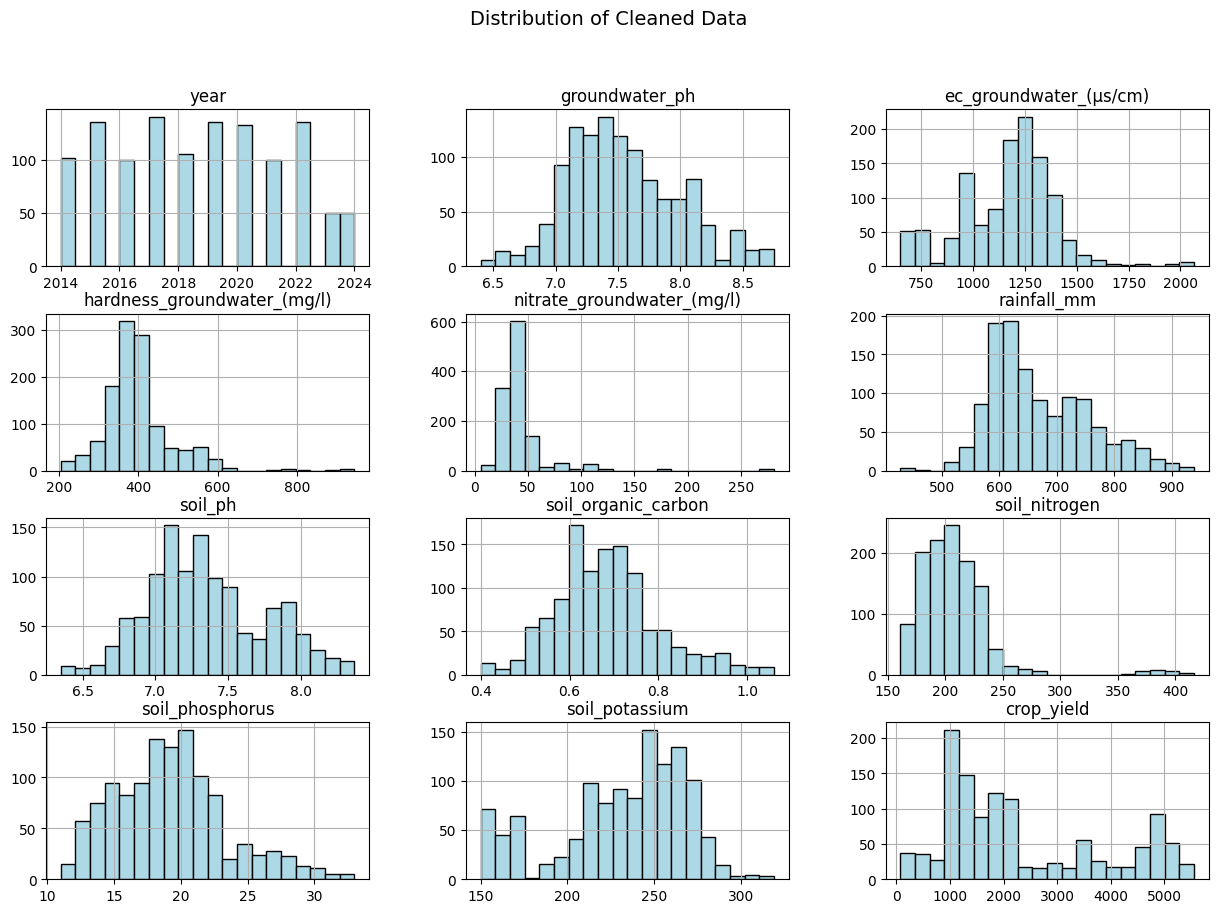

In [17]:
plt.figure(figsize=(12,6))
data.hist(figsize=(15,10), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Distribution of Cleaned Data", fontsize=14)
plt.show()

In [18]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

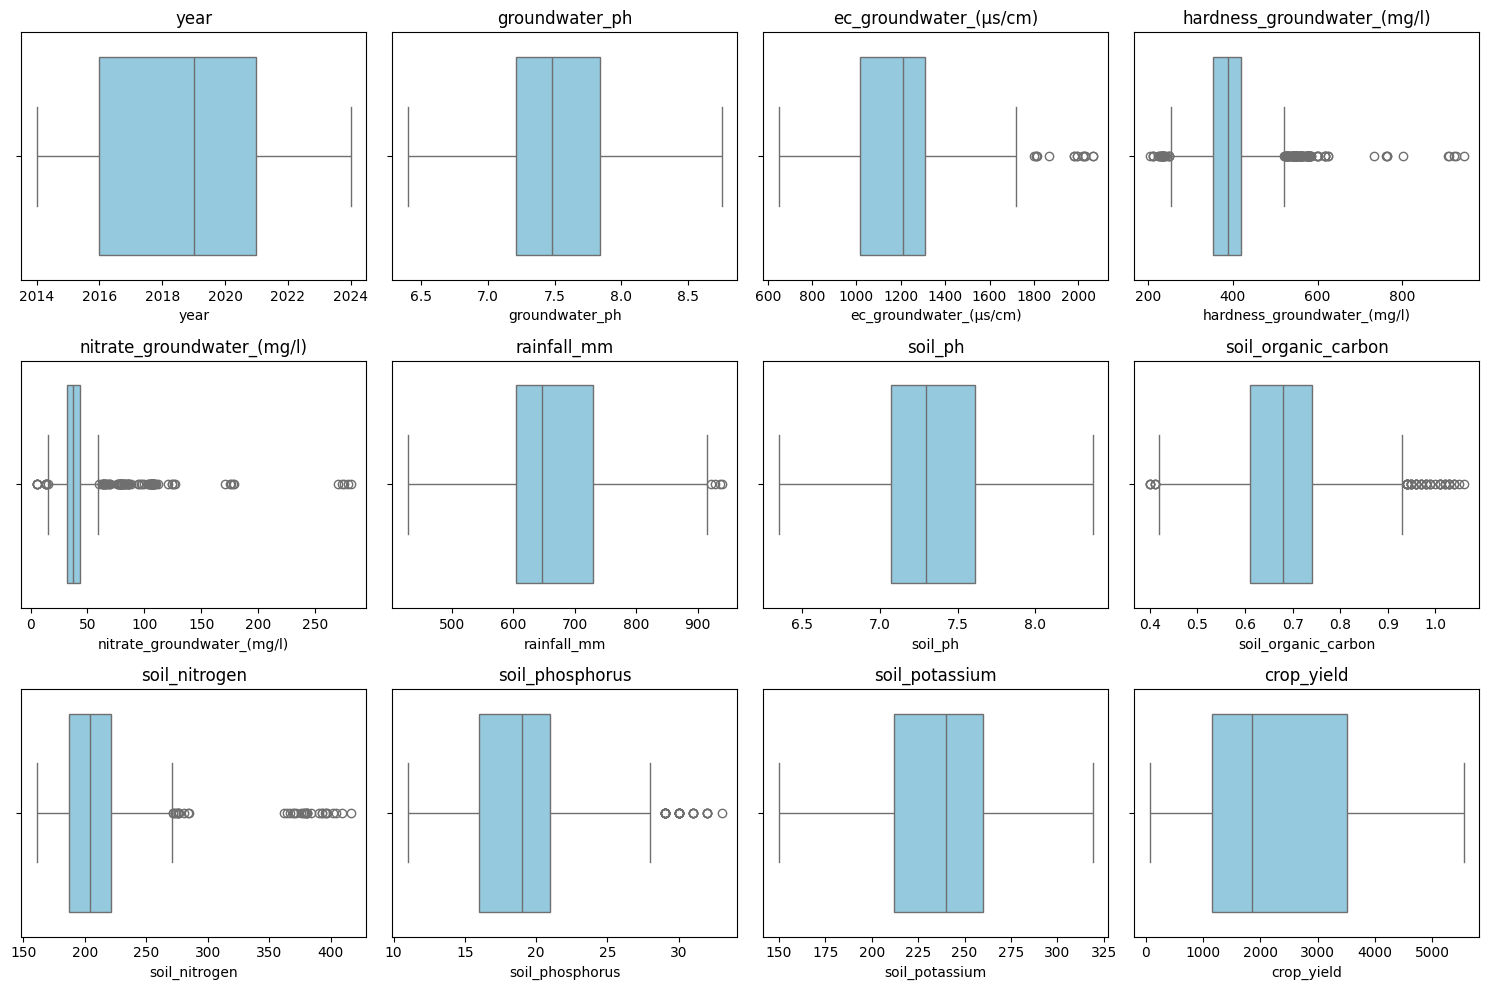

In [20]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

z_threshold = 3  # Usually 3 is a good balance
df_z = data[(np.abs(stats.zscore(data[num_cols])) < z_threshold).all(axis=1)]
print(f"Removed {len(data) - len(df_z)} outliers (Z-Score method)")

Removed 63 outliers (Z-Score method)


In [25]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

df_iqr = data.copy()
for col in num_cols:
    df_iqr[col] = cap_outliers(df_iqr[col])

In [27]:
df_iqr['groundwater_ph'] = df_iqr['groundwater_ph'].clip(4.5, 9.0)
df_iqr['soil_ph'] = df_iqr['soil_ph'].clip(4.5, 9.0)
df_iqr['ec_groundwater_(µs/cm)'] = df_iqr['ec_groundwater_(µs/cm)'].clip(100, 5000)
df_iqr['nitrate_groundwater_(mg/l)'] = df_iqr['nitrate_groundwater_(mg/l)'].clip(0, 100)
df_iqr['hardness_groundwater_(mg/l)'] = df_iqr['hardness_groundwater_(mg/l)'].clip(0, 1000)
df_iqr['rainfall_mm'] = df_iqr['rainfall_mm'].clip(0, 3000)
df_iqr['crop_yield'] = df_iqr['crop_yield'].clip(lower=0)

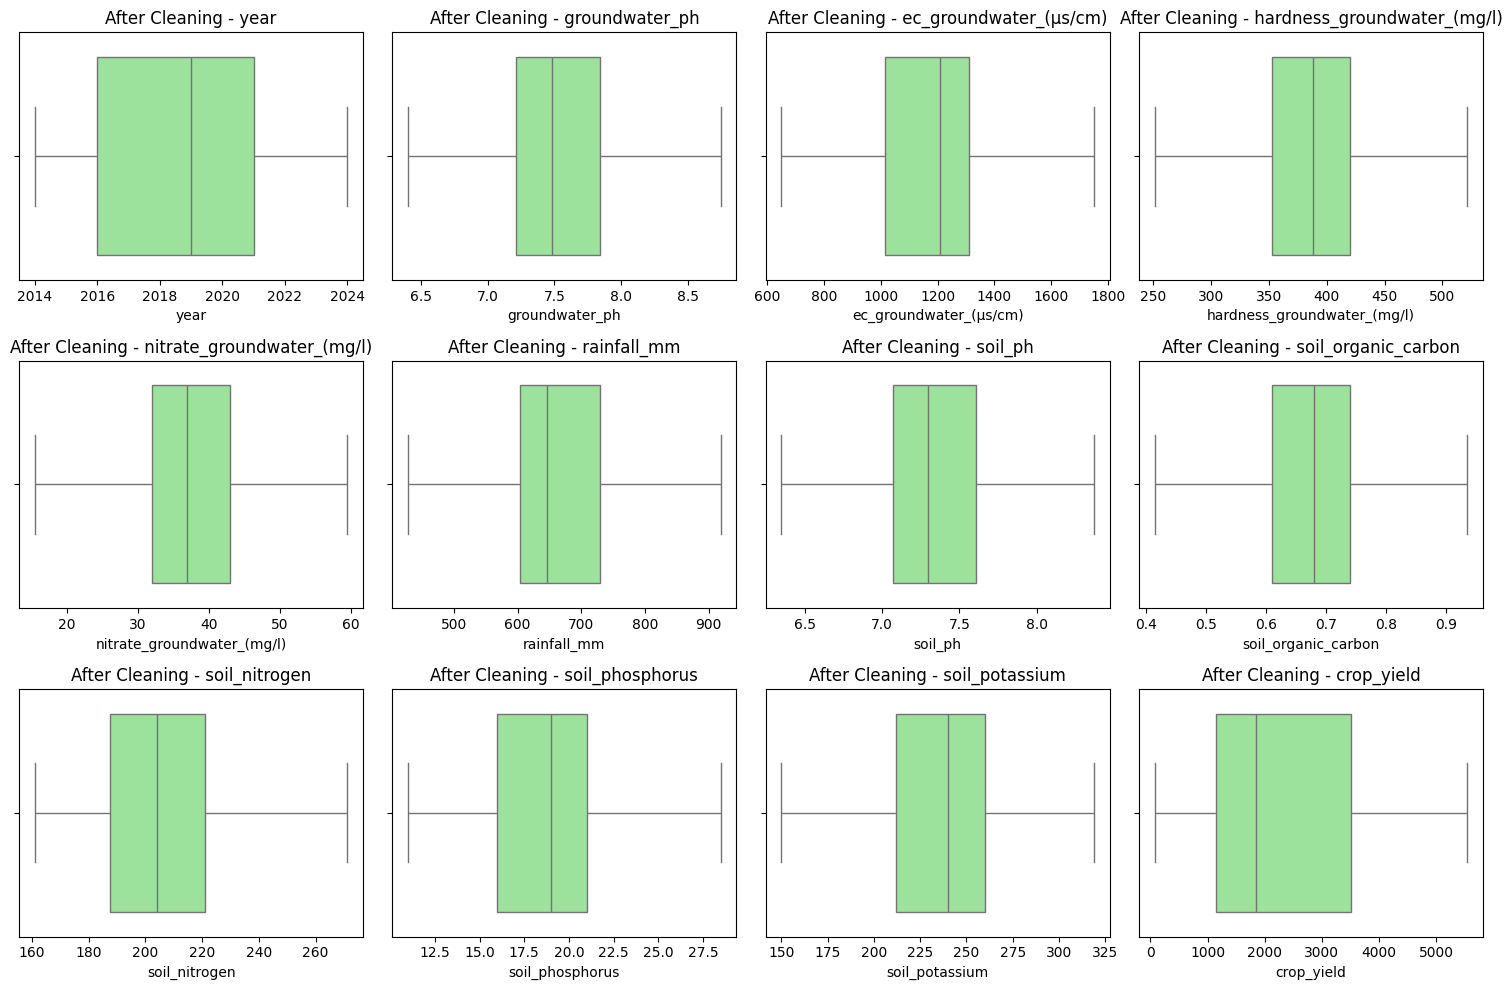

In [28]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_iqr[col], color='lightgreen')
    plt.title(f"After Cleaning - {col}")
plt.tight_layout()
plt.show()

In [29]:
print("Before Cleaning:\n", data[num_cols].describe())
print("\nAfter Cleaning:\n", df_iqr[num_cols].describe())

Before Cleaning:
               year  groundwater_ph  ec_groundwater_(µs/cm)  \
count  1183.000000     1183.000000             1183.000000   
mean   2018.540997        7.542511             1173.630549   
std       2.879086        0.448468              225.058632   
min    2014.000000        6.400000              650.000000   
25%    2016.000000        7.210000             1014.070000   
50%    2019.000000        7.480000             1209.560000   
75%    2021.000000        7.840000             1308.920000   
max    2024.000000        8.750000             2065.180000   

       hardness_groundwater_(mg/l)  nitrate_groundwater_(mg/l)  rainfall_mm  \
count                  1183.000000                 1183.000000  1183.000000   
mean                    398.070355                   42.071420   669.402367   
std                      83.889403                   23.909756    86.283818   
min                     204.700000                    5.370000   428.000000   
25%                     352.

In [30]:
df_iqr.to_excel("Cleaned_Dataset.xlsx", index=False)
df_iqr.to_csv("Cleaned_Dataset.csv", index=False)
print("\n✅ Cleaned dataset saved successfully as:")
print(" - Cleaned_Dataset.xlsx")
print(" - Cleaned_Dataset.csv")


✅ Cleaned dataset saved successfully as:
 - Cleaned_Dataset.xlsx
 - Cleaned_Dataset.csv


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
df = pd.read_csv("Cleaned_Dataset.csv")

In [33]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

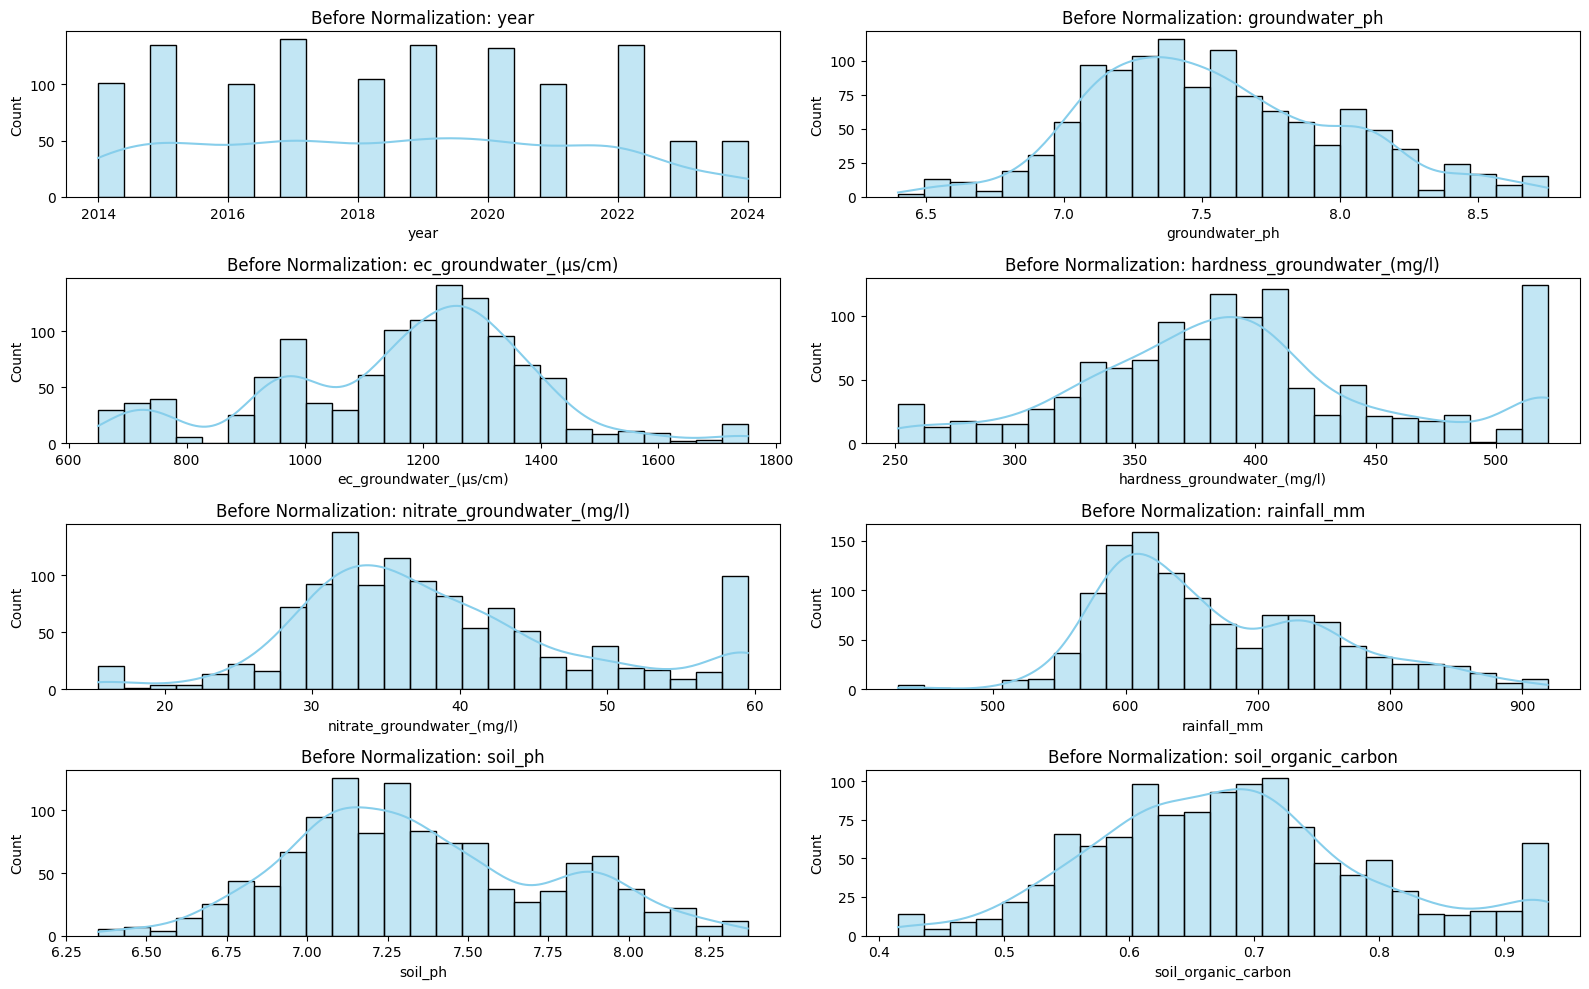

In [34]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols[:8]):  # plot first 8 for readability
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[col], kde=True, color="skyblue", bins=25)
    plt.title(f"Before Normalization: {col}")
plt.tight_layout()
plt.show()

In [35]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

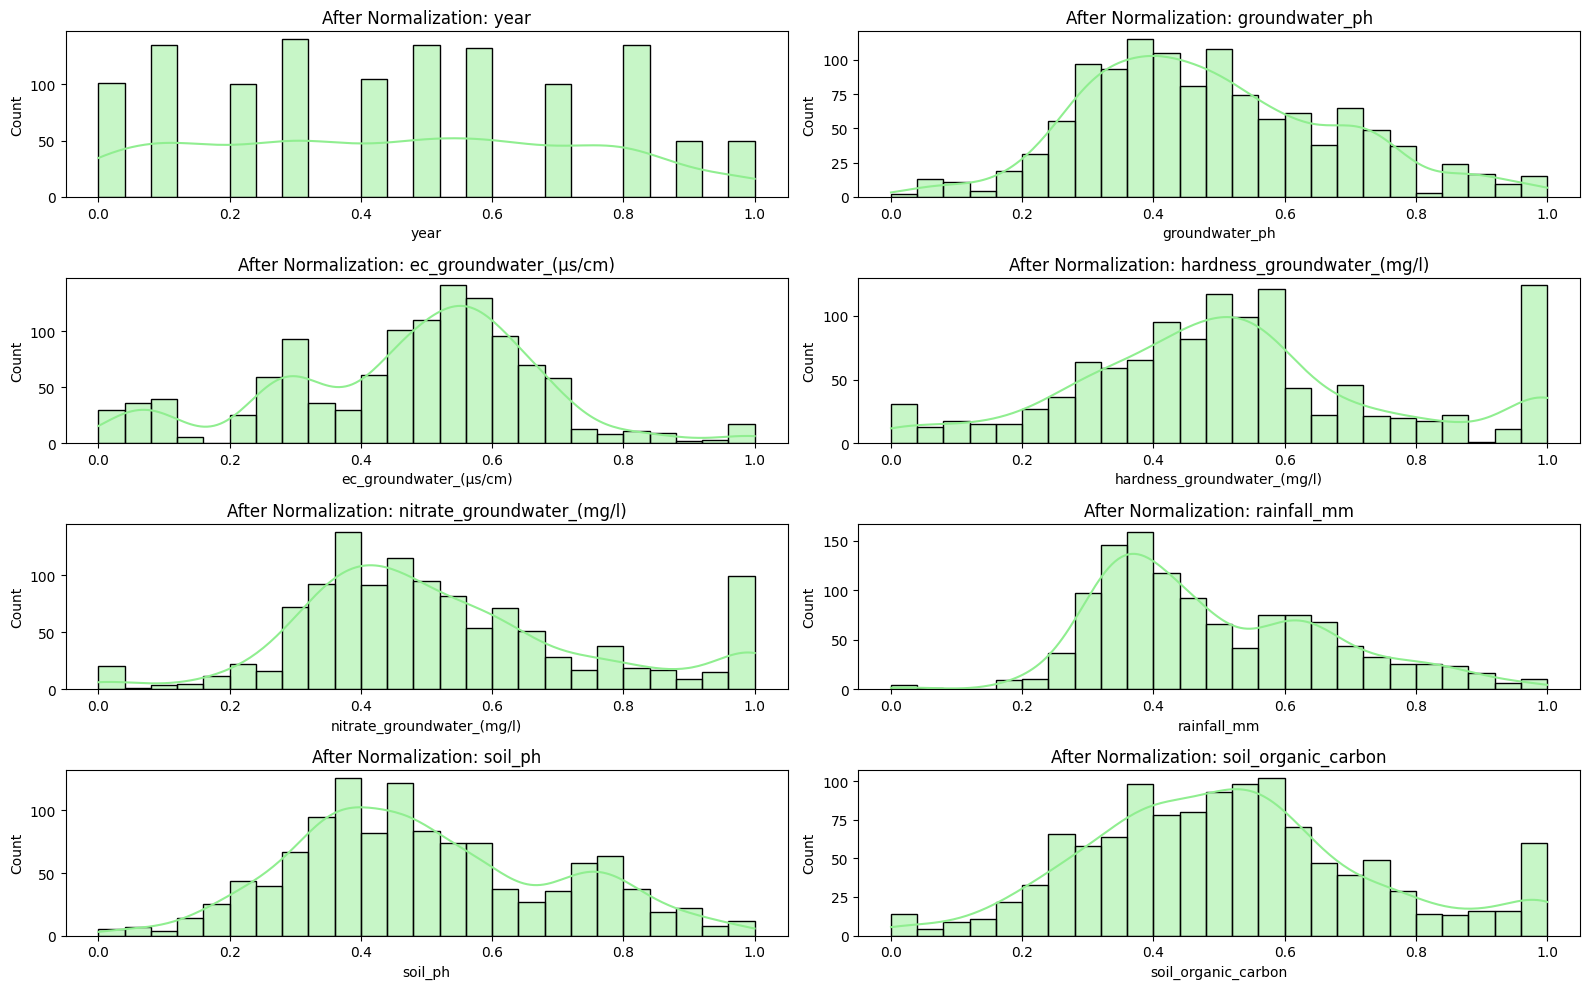

In [36]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols[:8]):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df_scaled[col], kde=True, color="lightgreen", bins=25)
    plt.title(f"After Normalization: {col}")
plt.tight_layout()
plt.show()

c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


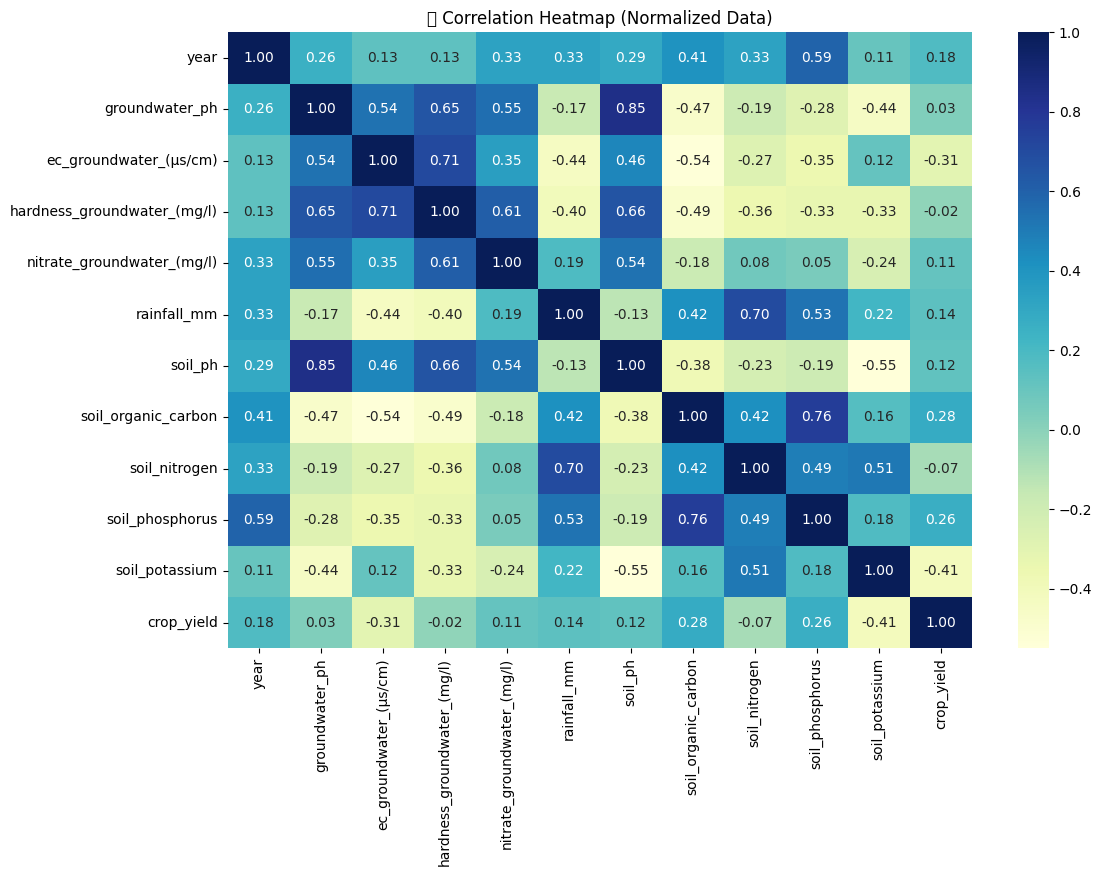

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled[num_cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📈 Correlation Heatmap (Normalized Data)")
plt.show()

In [38]:
df_scaled.to_csv("Normalized_Dataset.csv", index=False)
df_scaled.to_excel("Normalized_Dataset.xlsx", index=False)
print("✅ Normalized data saved as 'Normalized_Dataset.csv'")

✅ Normalized data saved as 'Normalized_Dataset.csv'
